# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/data/NBA_players_2015.csv), [data dictionary](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/slides/07_nba_paper.pdf)
- **Problem to solve:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [5]:
# read the data into a DataFrame named nba
import pandas as pd
path = '../data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [6]:
# read the data into a DataFrame named nba
import pandas as pd
path = '/Users/oweho/Desktop/Knowledge Base/Github/GA-SEA-DAT2/data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [9]:
# examine the columns names to see what's there
nba.columns

Index([u'season_end', u'player', u'pos', u'age', u'bref_team_id', u'g', u'gs',
       u'mp', u'fg', u'fga', u'fg_', u'x3p', u'x3pa', u'x3p_', u'x2p', u'x2pa',
       u'x2p_', u'ft', u'fta', u'ft_', u'orb', u'drb', u'trb', u'ast', u'stl',
       u'blk', u'tov', u'pf', u'pts', u'G', u'MP', u'PER', u'TS%', u'3PAr',
       u'FTr', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OWS',
       u'DWS', u'WS', u'WS/48', u'OBPM', u'DBPM', u'BPM', u'VORP'],
      dtype='object')

In [10]:
# examine the number of players in each position to get a feel for the data
nba.age.value_counts()

23    56
24    48
26    44
25    39
28    37
27    35
29    34
22    31
21    24
30    23
34    19
32    18
31    16
33    14
20    12
19     8
37     6
35     6
36     4
38     4
Name: age, dtype: int64

In [11]:
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

In [12]:
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [14]:
# map positions to numbers
# Specifically map the position names (C, F and G) to numbers starting with 0
#   and store them in a new column named 'pos_num'.
# We need to do this because KNN model algorithms require that the features
#   and responses be numeric.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [16]:
# create feature matrix (X) (it is a dataframe) that contains these columns from the nba dataframe:
# 'ast', 'stl', 'blk', 'tov', 'pf'
feature_columns = ['ast', 'stl', 'blk', 'tov', 'pf']
x = nba [feature_columns]
print (x)

      ast  stl  blk  tov   pf
0     1.0  0.4  0.3  0.9  2.2
1     0.4  0.4  0.3  0.4  0.8
2     1.0  0.4  1.2  1.6  3.0
3     0.9  0.2  0.5  0.5  1.8
4     1.9  0.6  0.1  1.6  2.1
5     0.6  0.3  0.7  1.0  2.3
6     0.6  0.4  0.4  0.4  1.8
7     1.0  0.6  0.9  1.0  2.1
8     1.8  0.7  1.0  1.8  1.9
9     1.3  0.3  0.8  0.7  1.8
10    1.4  2.0  0.5  1.3  2.8
11    0.7  1.0  0.9  0.7  1.8
12    1.2  0.4  0.9  0.8  2.5
13    0.7  0.5  1.0  0.5  1.6
14    1.1  0.7  0.1  0.8  1.9
15    1.0  0.5  0.3  0.4  1.0
16    1.0  0.6  0.3  1.1  2.0
17    2.5  1.1  1.1  2.2  3.0
18    3.1  1.0  0.4  2.2  2.2
19    0.1  0.2  0.6  0.2  0.9
20    0.9  0.2  0.3  0.9  2.1
21    2.4  1.9  0.2  1.7  2.4
22    0.9  0.8  0.5  0.8  2.5
23    0.9  0.4  0.8  1.3  1.9
24    4.7  0.7  0.0  1.9  1.2
25    0.3  0.2  0.2  0.4  1.2
26    0.4  0.3  0.2  0.4  1.1
27    0.1  0.1  0.1  0.2  0.6
28    1.1  0.6  0.1  0.7  1.4
29    3.3  0.4  0.0  0.9  1.3
..    ...  ...  ...  ...  ...
448  10.0  1.8  0.6  3.7  2.3
449   0.2 

In [19]:
# create response vector (y) that contains the position numbers (our labels)
y = nba.pos
print (y)

0      F
1      G
2      C
3      F
4      G
5      C
6      F
7      C
8      F
9      F
10     G
11     F
12     F
13     C
14     G
15     F
16     F
17     G
18     F
19     C
20     F
21     F
22     F
23     C
24     G
25     F
26     F
27     F
28     G
29     G
      ..
448    G
449    F
450    F
451    G
452    F
453    F
454    F
455    G
456    C
457    F
458    G
459    G
460    G
461    F
462    G
463    G
464    F
465    G
466    F
467    F
468    C
469    G
470    F
471    F
472    G
473    G
474    G
475    F
476    C
477    C
Name: pos, dtype: object


## Step 3: Train a KNN model (K=5)

In [20]:
# import KNN class we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# instantiate the estimator with K=5
knn = KNeighborsClassifier(n_neighbors=5)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [22]:
# run a knn.fit on the data to build the model
print knn
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Use the model:
## Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [23]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [27]:
knn.predict(player)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['F'], dtype=object)

In [25]:
# make a prediction with the model
new_player = [2,1,0,2,1]
knn.predict(new_player)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['F'], dtype=object)

In [26]:
# calculate the predicted probabilities
knn.predict_proba(new_player)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.2,  0.4,  0.4]])

## Step 5: Repeat steps 3 and 4 using K=50

In [34]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)
type(knn)
knn.fit(x,y)
knn.predict([new_player])

array(['G'], dtype=object)

In [31]:
# calculate predicted probabilities
knn.predict_proba(player)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.04,  0.26,  0.7 ]])

## Bonus: Explore the features to ones ones that likely are the most predictive

In [7]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [8]:
# get a describe of assists grouped by position.  Use .unstack() to format the output
nba.groupby('pos').ast.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
pos,,,,,,,,
C,79,0.945570,0.858263,0,0.40,0.80,1.15,4.4
F,199,1.173367,1.086252,0,0.45,0.90,1.50,7.3
G,200,2.729000,2.128287,0,1.10,2.25,3.80,10.2


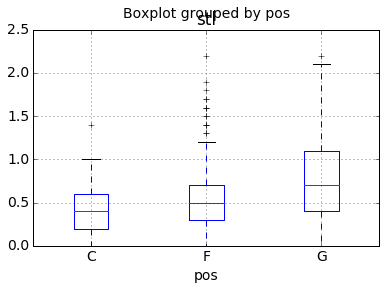

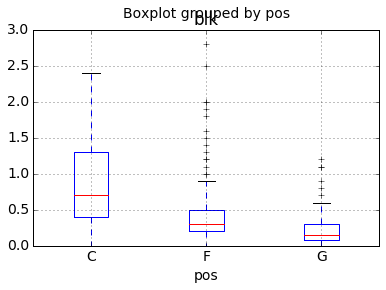

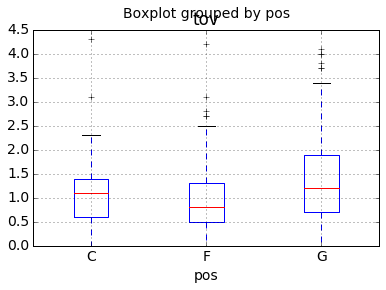

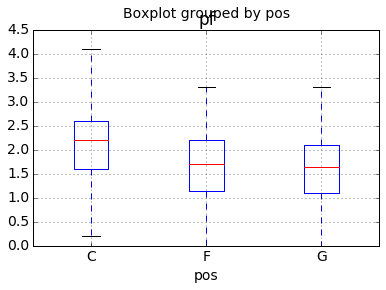

In [10]:
nba.boxplot(column='stl', by='pos')

nba.boxplot(column='blk', by='pos')

nba.boxplot(column='tov', by='pos')

nba.boxplot(column='pf', by='pos')

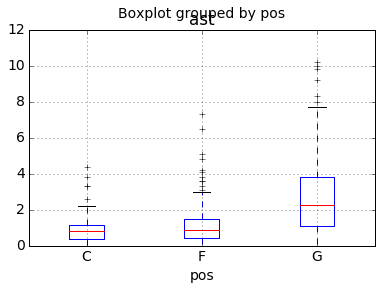

In [11]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos')

In [ ]:
# group plot of histograms of assists grouped by position
